In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#LEER ARCHIVO DESDE EL EXCEL
dataframe = pd.read_excel("etl_final.xlsx")
print("Datos cargados desde el excel")


Datos cargados desde el excel


In [ ]:
#--DESCRIPCION GENERAL DE LOS DATOS

print("\n----DESCRIPCIÓN GENERAL----")
print(dataframe.info())          # resumen general
print("\nPrimeras 5 filas:")
print(dataframe.head())         # primeras filas
print("\nDimensiones (filas, columnas):")
print(dataframe.shape)


----DESCRIPCIÓN GENERAL----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18433 entries, 0 to 18432
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Periodo       18433 non-null  int64  
 1   Dia           18433 non-null  int64  
 2   EquipoSim     18433 non-null  object 
 3   Tipo          18433 non-null  object 
 4   Subtipo       18433 non-null  object 
 5   Marca         18433 non-null  object 
 6   Gama          18433 non-null  object 
 7   Ingreso       18433 non-null  float64
 8   Costo         18433 non-null  float64
 9   margen        18433 non-null  float64
 10  Tipo_Venta    18433 non-null  object 
 11  CanalVenta    18433 non-null  object 
 12  CadenaDealer  18433 non-null  object 
 13  Departamento  18433 non-null  object 
 14  Canal         18433 non-null  object 
 15  SubCanal      18433 non-null  object 
 16  Cluster       18433 non-null  object 
dtypes: float64(3), int64(2), object(12)
memo

In [ ]:
#---------ESTADISTICA DESCRIPTIVA

variables_interes = ["Ingreso", "Costo", "margen", "Dia"]
percentiles=[0.2,0.8]

print("\n------------ESTADÍSTICAS DESCRIPTIVAS-------")
print(dataframe[variables_interes].describe())
print("\n        OTROS EJEMPLOS DE ESTADÍSTICAS DESCRIPTIVAS     ")
print("\n HALLAR LA MODA")
print(dataframe[variables_interes].mode())
print("\n HALLAR LA VARIANZA")
print(dataframe[variables_interes].var())
print("\n HALLAR LA SUMA INDIVIDUAL DE CADA VARIABLE INTERES")
print(dataframe[variables_interes].sum())
print("\n HALLAR LOS VALORES NULOS POR CADA VARIABLE DE INTERES")
print(dataframe[variables_interes].isnull())
print("\n HALLAR LA SUMA DE LOS VALORES NULOS POR CADA VARIABLE DE INTERES")
print(dataframe[variables_interes].isnull().sum())
print("\n HALLAR EL PERCENTIL AL 20% Y 80%")
print(dataframe[variables_interes].quantile(percentiles))



------------ESTADÍSTICAS DESCRIPTIVAS-------
            Ingreso         Costo        margen           Dia
count  18433.000000  18433.000000  18433.000000  18433.000000
mean     544.080312    367.375797    176.704516     15.933869
std      339.347695    248.478995    157.384172      8.854529
min       47.660000     30.230000      0.030000      1.000000
25%      273.010000    187.070000     26.640000      8.000000
50%      585.240000    399.580000    130.000000     16.000000
75%      782.570000    561.330000    310.000000     23.000000
max     4729.580000   4271.580000   1125.120000     31.000000

        OTROS EJEMPLOS DE ESTADÍSTICAS DESCRIPTIVAS     

 HALLAR LA MODA
   Ingreso   Costo  margen  Dia
0    49.12  406.99   23.16   21

 HALLAR LA VARIANZA
Ingreso    115156.858072
Costo       61741.810752
margen      24769.777596
Dia            78.402690
dtype: float64

 HALLAR LA SUMA INDIVIDUAL DE CADA VARIABLE INTERES
Ingreso    10029032.39
Costo       6771838.07
margen      3257194.34

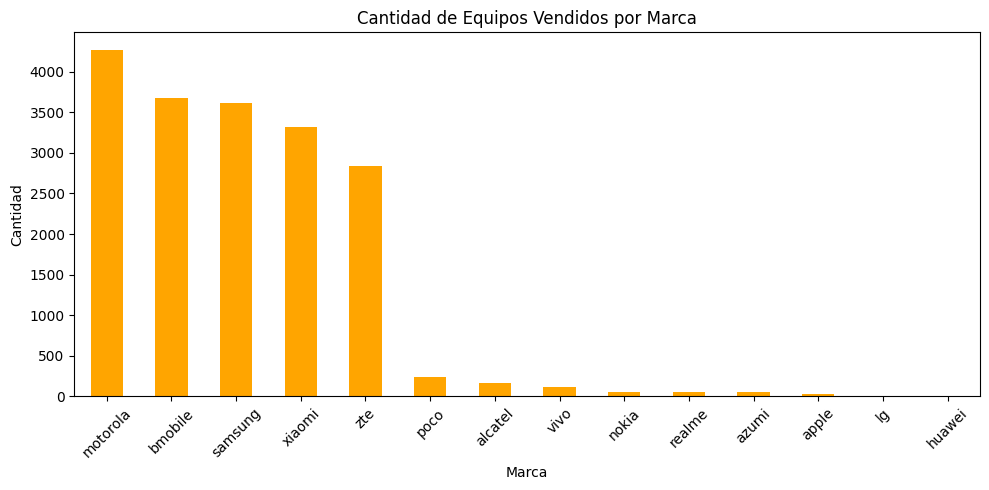

In [ ]:
#---------------GRAFICO . DISTRIBUCION DE MARCAS

plt.figure(figsize=(10,5))
dataframe["Marca"].value_counts().plot(kind="bar", color="orange")
plt.title("Cantidad de Equipos Vendidos por Marca")
plt.xlabel("Marca")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

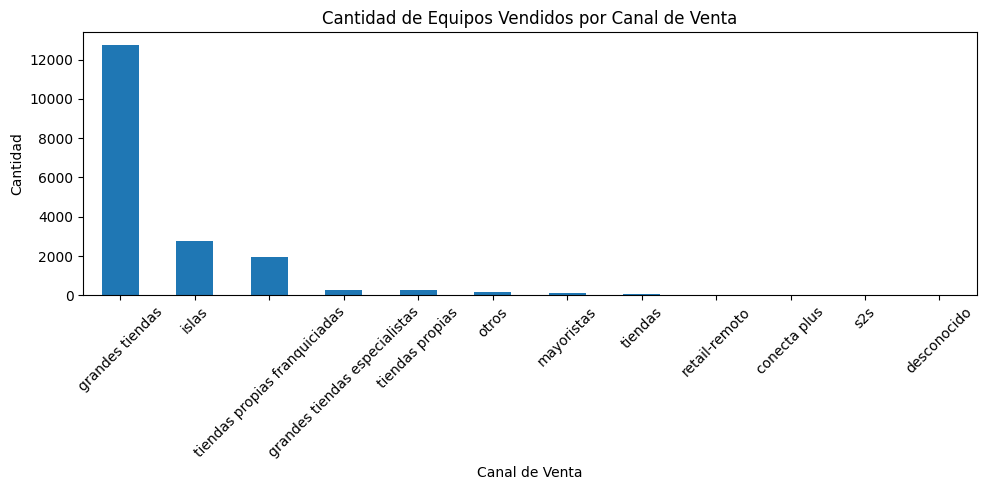

In [ ]:
#------GRAFICO DE BARRAS - EQUIPOS POR CANAL DE VENTA

plt.figure(figsize=(10,5))
dataframe["CanalVenta"].value_counts().plot(kind="bar")
plt.title("Cantidad de Equipos Vendidos por Canal de Venta")
plt.xlabel("Canal de Venta")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

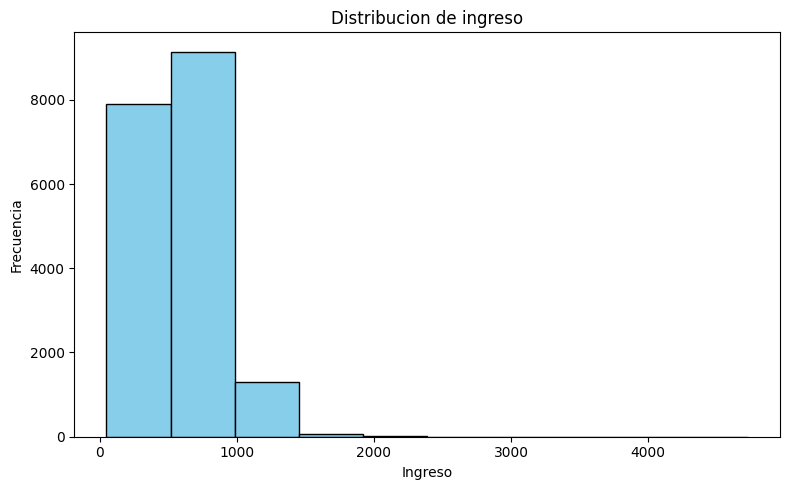

In [ ]:

#----HISTOGRAMA VARIABLE DE INGRESO

plt.figure(figsize=(8,5))
plt.hist(dataframe["Ingreso"], bins=10, color="skyblue", edgecolor="black")
plt.title("Distribucion de ingreso")
plt.xlabel("Ingreso")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()


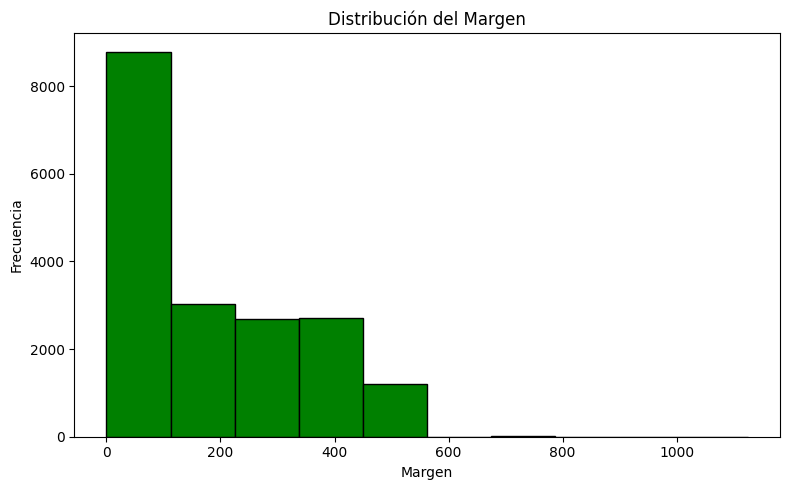

In [ ]:
#   5° GRÁFICO: HISTOGRAMA DE MÁRGENES


plt.figure(figsize=(8,5))
plt.hist(dataframe["margen"], bins=10, edgecolor="black", color="green")
plt.title("Distribución del Margen")
plt.xlabel("Margen")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

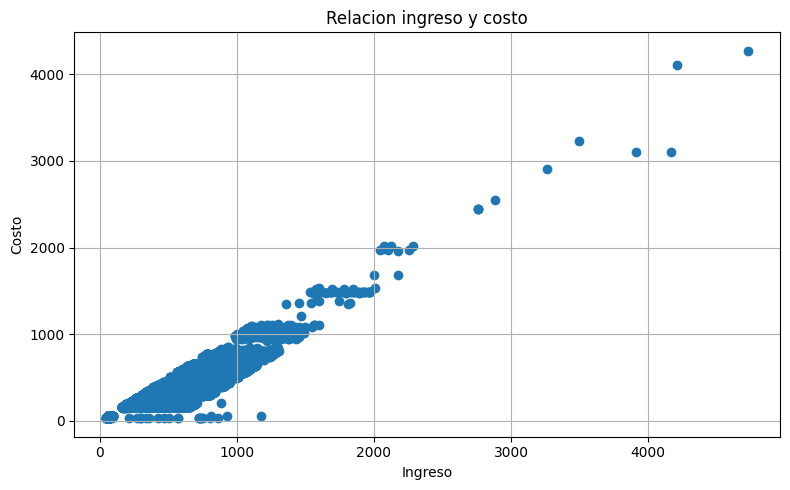

In [ ]:
# RELACION DE INGRESO VS COSTO  (Scartter plot)

plt.figure(figsize=(8,5))
plt.scatter(dataframe["Ingreso"], dataframe["Costo"])
plt.title("Relacion ingreso y costo")
plt.xlabel("Ingreso")
plt.ylabel("Costo")
plt.grid(True)
plt.tight_layout()
plt.show()

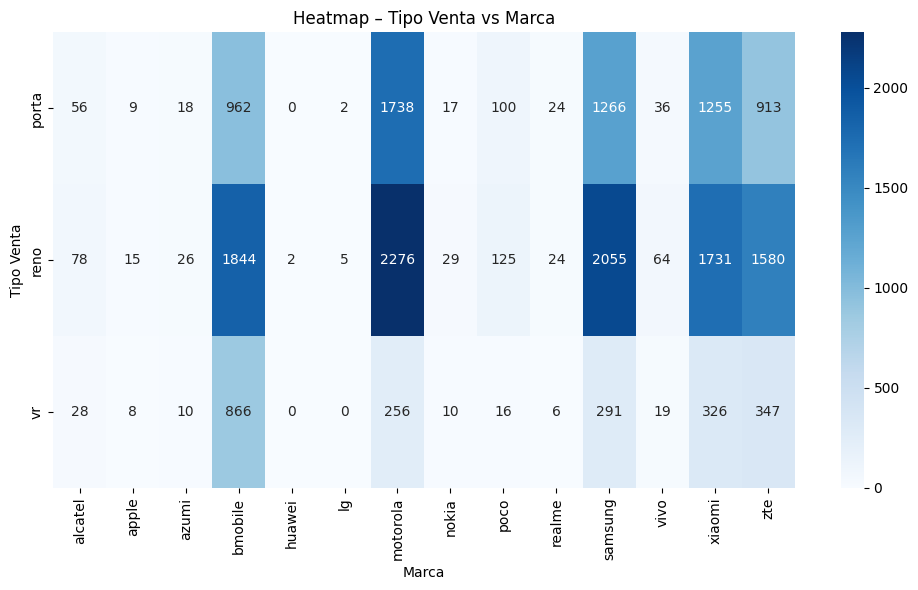

In [ ]:
#--Heatmap – TIPO DE VENTA VS MARCA

tabla = pd.crosstab(dataframe["Tipo_Venta"], dataframe["Marca"])

plt.figure(figsize=(10,6))
sns.heatmap(tabla, annot=True, cmap="Blues", fmt="d")
plt.title("Heatmap – Tipo Venta vs Marca")
plt.xlabel("Marca")
plt.ylabel("Tipo Venta")
plt.tight_layout()
plt.show()

In [ ]:
#CLUSTER QUE GENERA MAS INGRESOS

cluster_ingresos = dataframe.groupby("Cluster")["Ingreso"].sum().sort_values(ascending=False)

print("\n---INGRESO POR CLUSTER ")
print(cluster_ingresos)

mayor_cluster = cluster_ingresos.idxmax()
print(f"\n El cluster que trae más ingresos es: {mayor_cluster} ")x


---INGRESO POR CLUSTER 
Cluster
cluster a      6033705.61
cluster b      2920352.87
cluster c       992977.87
desconocido      81996.04
Name: Ingreso, dtype: float64

 El cluster que trae más ingresos es: cluster a 


In [ ]:
#¿QUÉ CANAL TIENE MAYOR MARGEN?

margen_canal = dataframe.groupby("Canal")["margen"].sum().sort_values(ascending=False)

print("\n MARGEN TOTAL POR CANAL ")
print(margen_canal)

canal_top = margen_canal.idxmax()
print(f"\n El canal con mayor margen es: {canal_top}")


 MARGEN TOTAL POR CANAL 
Canal
retail     2725493.65
islas       310163.01
tiendas     178981.53
otros        42556.15
Name: margen, dtype: float64

 El canal con mayor margen es: retail


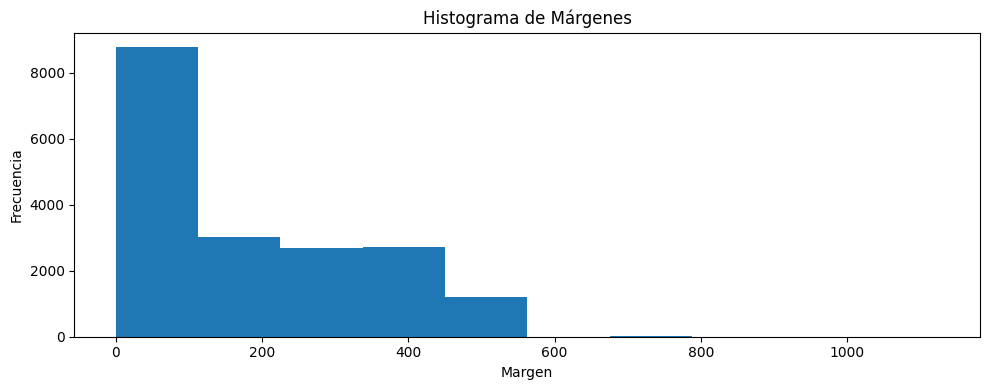

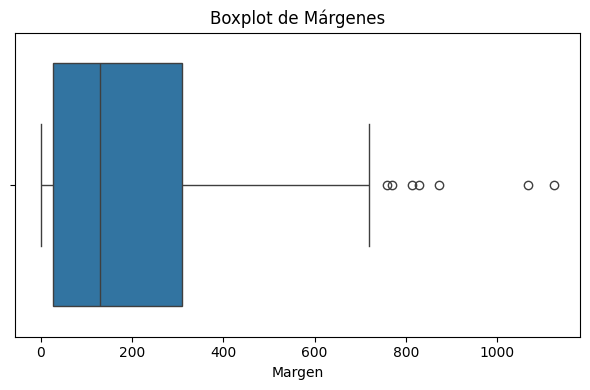

In [32]:
# --- DISTRIBUCIÓN DE MÁRGENES (HISTOGRAMA + BOXPLOT)


plt.figure(figsize=(10,4))
plt.hist(dataframe["margen"], bins=10)
plt.title("Histograma de Márgenes")
plt.xlabel("Margen")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x=dataframe["margen"])
plt.title("Boxplot de Márgenes")
plt.xlabel("Margen")
plt.tight_layout()
plt.show()

In [ ]:
#------ ¿QUÉ MES TUVO MÁS MARGEN?
# Columna "Periodo" viene como 202401 - extraemos el mes

dataframe["Periodo"] = dataframe["Periodo"].astype(str)

dataframe["Mes"] = dataframe["Periodo"].str[-2:]   # última parte → "01", "02", etc.

margen_mes = dataframe.groupby("Mes")["margen"].sum().sort_values(ascending=False)

print("\n----MARGEN POR MES ")
print(margen_mes)

mes_top = margen_mes.idxmax()
print(f"\n El mes con mayor margen fue: {mes_top}")


----MARGEN POR MES 
Mes
01    1086482.00
02     961167.00
03     928998.46
05     226131.54
04      54415.34
Name: margen, dtype: float64

 El mes con mayor margen fue: 01
